# HOW TO RETRIEVE AND USE VOLCANO DATA

# Manually collected data

Manually collected data are available through [GeoNet's Tilde API (Application Program Interface)](https://tilde.geonet.org.nz/v4/api-docs/). There is also a [Data Discovery GUI](https://tilde.geonet.org.nz/ui/data-discovery) and a [Data Exploration GUI](https://tilde.geonet.org.nz/ui/data-exploration) for browser-based interactive data retrieval and basic analysis.

For additional information on how to use Tilde with volcano data please refer to the [Supplementary notes](https://www.geonet.org.nz/data/supplementary/volcano_tilde_notes)

## &nbsp;Table of contents
### 1. Basic requirements
### 2. Water chemistry concentration data - basic data retrieval and graphing
### 3. Airborne gas emission rate data - basic data retrieval and graphing
### 4. Soil gas data - basic data retrieval and graphing
### 5. Lake levelling data - basic data retrieval and graphing
### 6. Retrieval without specifying data collection method - using airborne gas emission rate data
### 7. Retrieval without specifying sensor code - using water chemistry concentration data
### 8. Creating spreadsheet-like output - using water chemistry concentration data

## &nbsp;1. Basic requirements

### Import required Python modules/libraries

In [1]:
#for querying data
import requests
import json

#pandas for data analysis
import pandas as pd

#matplotlib for graphing
import matplotlib.pyplot as plt

#for getting CSV format data
from io import StringIO

#for system functions
import os

### Set the source URL

Using [API data endpoint](https://tilde.geonet.org.nz/v4/api-docs/endpoint/data)

In [2]:
#API version 4 data endpoint
source = 'https://tilde.geonet.org.nz/v4/data/'

## &nbsp;2. Water chemistry concentration data
## Basic data retrieval and graphing

We request data on the concentration of Chloride (Cl) in water from a lake at Inferno Crater.

For all manually collected data:
- domain = `manualcollect`

The specific parameters are:
  - station = `OT001`, the station code for Inferno Crater
  - name (type of data) = `lake-Cl-conc`
  - sensorcode = `MC01`, code to specify 'sub' collection points
  - method (of data collection) = `water-analysis-lab`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `OT001/lake-Cl-conc/MC01/water-analysis-lab/-`

Date range:
  - startdate = `2000-01-01`
  - enddate = `2024-09-01`<br>

The date range can also be specified as `latest`, followed by a time interval, e.g. `latest/7d` for data from the latest 7 days. The longest time interval is 30 days. Given the very low sampling rate of manually collected data, a request for the last 30 days of data is likely to return at most one data value (if any). For this reason, with manually collected data, specifiying a `startdate` and `enddate` is recommended.

Complete request
- `manualcollect/OT001/lake-Cl-conc/MC01/water-analysis-lab/-/2000-01-01/2024-09-01`

In [3]:
url = source+'manualcollect/OT001/lake-Cl-conc/MC01/water-analysis-lab/-/2000-01-01/2024-09-01'

We will now query the URL and ask for a CSV format to be returned. A 200 response code indicates everything went okay, and the result has been returned (if any).

In [4]:
r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

<Response [200]>


To work with the observation data we will use python's [pandas module](https://pandas.pydata.org/). We will now store the response of our request in a pandas dataframe (`df`), using `pd.read_csv`. By using `parse_dates=['timestamp']` we can convert the 'timestamp' column to a datetime, which makes it easier to work with the data. We add `date_format='ISO8601'` to ensure that pandas uses the full `ISO 8601` datetime format we record our data in. Using `index_col`, we can set the date and time as the index of the dataframe. More information on `pd.read_csv` can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html. We need to use the `StringIO` function with the text returned from our query. By printing the beginning of the result, with `df.head()`, we can see the first 5 lines of the dataframe from our query.

Once we have the data in the dataframe, we can begin our analysis.

In [5]:
df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2009-02-04 00:00:00+00:00,manualcollect,OT001,lake-Cl-conc,MC01,water-analysis-lab,nil,922.0,mg/L,0.0,mg/L,NaN
2010-06-04 00:00:00+00:00,manualcollect,OT001,lake-Cl-conc,MC01,water-analysis-lab,nil,874.0,mg/L,0.0,mg/L,NaN
2011-06-29 00:00:00+00:00,manualcollect,OT001,lake-Cl-conc,MC01,water-analysis-lab,nil,896.0,mg/L,0.0,mg/L,NaN
2012-05-02 00:00:00+00:00,manualcollect,OT001,lake-Cl-conc,MC01,water-analysis-lab,nil,867.0,mg/L,0.0,mg/L,NaN
2013-01-17 00:00:00+00:00,manualcollect,OT001,lake-Cl-conc,MC01,water-analysis-lab,nil,886.0,mg/L,0.0,mg/L,NaN


#### Data Summary
By using `df.describe()` we can summarise the returned data as this features generates descriptive statistics from dataframes. We can see the number of values (and errors). All the qc values are currently undefined. By default, we also get to see the mean, standard deviation, minimum, maximum, and some percentile values.

In [6]:
df.describe()

,value,error,qualityControl
count,16.000000,16.0,0.0
mean,861.187500,0.0,NaN
std,32.073288,0.0,NaN
min,799.000000,0.0,NaN
25%,837.000000,0.0,NaN
50%,865.000000,0.0,NaN
75%,884.500000,0.0,NaN
max,922.000000,0.0,NaN


#### Basic Data Plot
By using the value column from our dataframe we are able to produce a basic graph of the chloride concentration against time.

Text(0, 0.5, 'chloride(Cl) concentration (mg/L)')

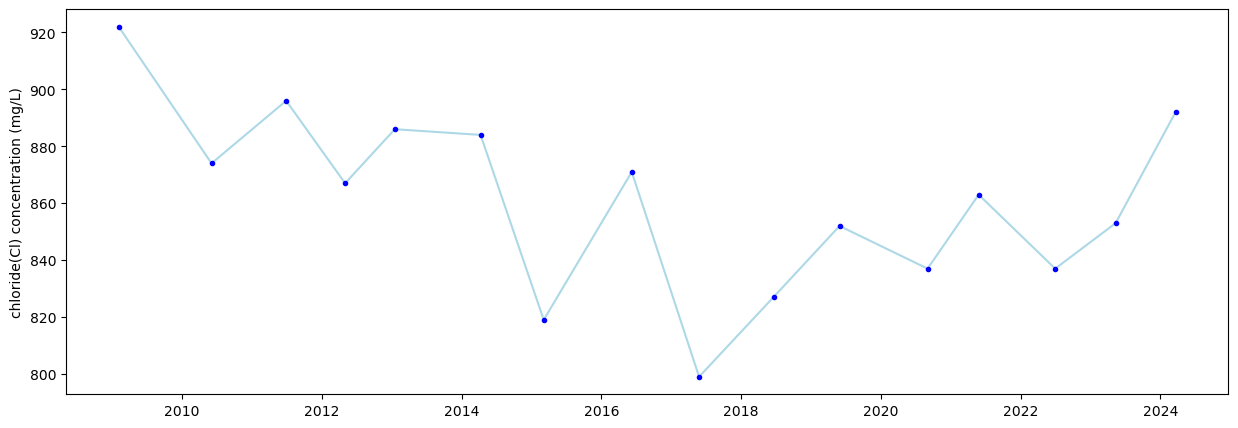

In [7]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='lightblue')
ax.plot(df.index, df['value'], color='blue', marker='.', linestyle='None')   
ax.set_ylabel('chloride(Cl) concentration (mg/L)')

## &nbsp;3. Airborne gas emission rate data
## Basic data retrieval and graphing

We request sulphur dioxide (SO2) emission rate from Whakaari/White Island collected using a Flyspec sensor.

For all manually collected data:
- domain = `manualcollect`

The required parameters are:
  - station = `WI000`, the station code for Whakaari/White Island as a singular entity
  - name (type of data) = `plume-SO2-gasflux`
  - sensorcode = `MC01`, code to specify 'sub' collection points
  - method (of data collection) = `flyspec`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `WI000/plume-SO2-gasflux/MC01/flyspec/-`

Date range:
- dates = `2023-01-01/2024-09-01`
  - startdate = `2023-01-01`
  - enddate = `2024-09-01`
Instead of providing two dates, the date range can be specified as `latest` followed by a time interval, e.g. `latest/7d` for data from the latest 7 days. The longest time interval is 30 days. Given the very low sampling rate of manually collected data, data from the last 30 days is likely to retrieve at most one data value. For this reason, with manually collected data, specifiying a `startdate` and `enddate` is recommended.

Complete request
- `manualcollect/WI000/plume-SO2-gasflux/MC01/flyspec/-/2023-01-01/2024-09-01`

In [8]:
url = source+'manualcollect/WI000/plume-SO2-gasflux/MC01/flyspec/-/2023-01-01/2024-09-01'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2023-02-07 23:30:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,flyspec,nil,1.99074,kg/s,0.067130,kg/s,NaN
2023-03-09 12:30:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,flyspec,nil,2.91667,kg/s,0.370370,kg/s,NaN
2023-04-26 01:00:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,flyspec,nil,1.16898,kg/s,0.081018,kg/s,NaN
2023-06-12 02:30:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,flyspec,nil,2.01389,kg/s,0.219907,kg/s,NaN
2023-09-13 00:30:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,flyspec,nil,2.77778,kg/s,0.266204,kg/s,NaN


Text(0, 0.5, 'sulphur dioxide (SO2) emission rate (kg/s)')

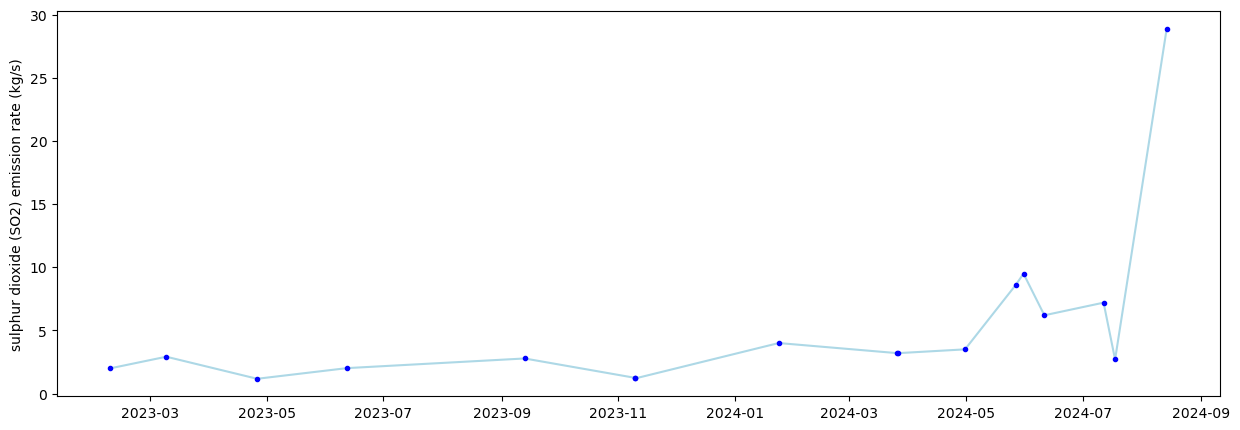

In [9]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='lightblue')
ax.plot(df.index, df['value'], color='blue', marker='.', linestyle='None')   
ax.set_ylabel('sulphur dioxide (SO2) emission rate (kg/s)')

## &nbsp;4. Soil gas data
## Basic data retrieval and graphing

We request carbon dioxide (CO$_2$) emission rate from Whakaari/White Island collected using an accumulation chamber.

For all manually collected data:
- domain = `manualcollect`

The required parameters are:
  - station = `WI020`, the station code for a soil gas measurement location at Whakaari/White Island
  - name (type of data) = `ground-CO2-gasflux`
  - sensorcode = `MC01`, code to specify 'sub' collection points
  - method (of data collection) = `surface-accumulation-chamber`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `WI020/ground-CO2-gasflux/MC01/surface-accumulation-chamber/-`

Date range:
  - startdate = `2000-01-01`
  - enddate = `2020-01-01`<br>
Instead of providing two dates, the date range can be specified as `latest` followed by a time interval, e.g. `latest/7d` for data from the latest 7 days. The longest time interval is 30 days. Given the very low sampling rate of manually collected data, data from the last 30 days is likely to retrieve at most one data value. For this reason, with manually collected data, specifiying a `startdate` and `enddate` is recommended.

Complete request
- `WI020/ground-CO2-gasflux/MC01/surface-accumulation-chamber/-/2000-01-01/2020-01-01`

In [10]:
url = source+'manualcollect/WI020/ground-CO2-gasflux/MC01/surface-accumulation-chamber/-/2000-01-01/2020-01-01'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2002-11-27 00:00:00+00:00,manualcollect,WI020,ground-CO2-gasflux,MC01,surface-accumulation-chamber,nil,72.10,g/m2/day,0.0,g/m2/day,NaN
2004-05-18 00:00:00+00:00,manualcollect,WI020,ground-CO2-gasflux,MC01,surface-accumulation-chamber,nil,119.09,g/m2/day,0.0,g/m2/day,NaN
2004-08-03 00:00:00+00:00,manualcollect,WI020,ground-CO2-gasflux,MC01,surface-accumulation-chamber,nil,1088.50,g/m2/day,0.0,g/m2/day,NaN
2004-11-10 00:00:00+00:00,manualcollect,WI020,ground-CO2-gasflux,MC01,surface-accumulation-chamber,nil,91.94,g/m2/day,0.0,g/m2/day,NaN
2005-02-22 00:00:00+00:00,manualcollect,WI020,ground-CO2-gasflux,MC01,surface-accumulation-chamber,nil,140.96,g/m2/day,0.0,g/m2/day,NaN


Text(0, 0.5, 'carbon dioxide (CO$_2$) emission rate (g/m$^2$/day)')

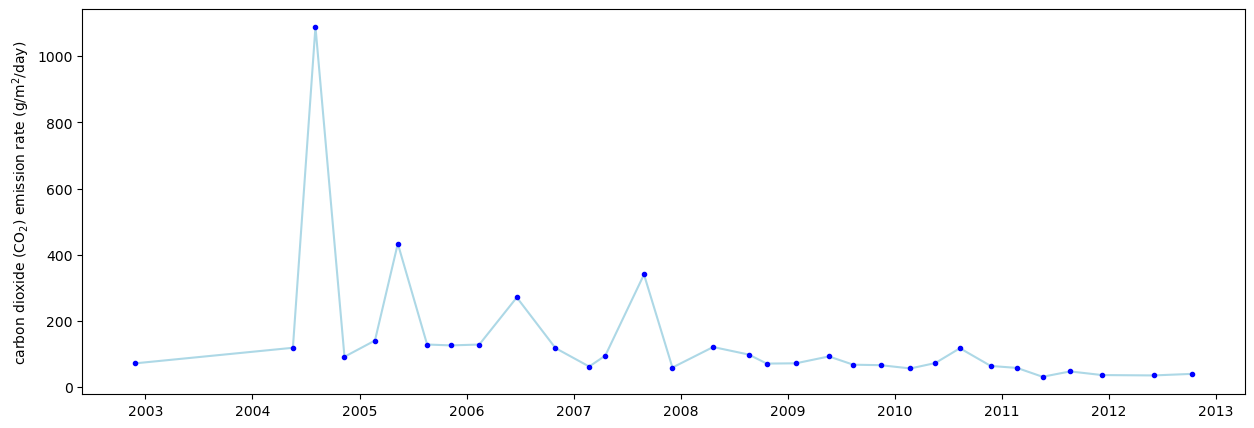

In [11]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='lightblue')
ax.plot(df.index, df['value'], color='blue', marker='.', linestyle='None')   
ax.set_ylabel('carbon dioxide (CO$_2$) emission rate (g/m$^2$/day)')

## &nbsp;5. Lake levelling data
## Basic data retrieval and graphing

We request lake levelling data from station at Lake Taupo.

For all manually collected data:
- domain = `manualcollect`

The required parameters are:
  - station = `TP005`, the station code for a lake levelling measurement location at Whakaari/White Island
  - name (type of data) = `ground-vertical-displacement`
  - sensorcode = `MC01`, code to specify 'sub' collection points
  - method (of data collection) = `lake-levelling`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `TP005/ground-vertical-displacement/MC01/lake-levelling/-`

Date range:
  - startdate = `1970-01-01`
  - enddate = `2024-01-01`

Complete request
- `manualcollect/TP005/ground-vertical-displacement/MC01/lake-levelling/-/1970-01-01/2024-01-01`

In [12]:
url = source+'manualcollect/TP005/ground-vertical-displacement/MC01/lake-levelling/-/1970-01-01/2024-01-01'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
1979-07-04 00:00:00+00:00,manualcollect,TP005,ground-vertical-displacement,MC01,lake-levelling,nil,0.000,m,0.006,m,NaN
1979-11-16 00:00:00+00:00,manualcollect,TP005,ground-vertical-displacement,MC01,lake-levelling,nil,0.001,m,0.006,m,NaN
1980-05-14 00:00:00+00:00,manualcollect,TP005,ground-vertical-displacement,MC01,lake-levelling,nil,-0.005,m,0.006,m,NaN
1980-10-08 00:00:00+00:00,manualcollect,TP005,ground-vertical-displacement,MC01,lake-levelling,nil,-0.002,m,0.006,m,NaN
1981-03-24 00:00:00+00:00,manualcollect,TP005,ground-vertical-displacement,MC01,lake-levelling,nil,-0.013,m,0.006,m,NaN


Text(0, 0.5, 'vertical ground displacemet (m)')

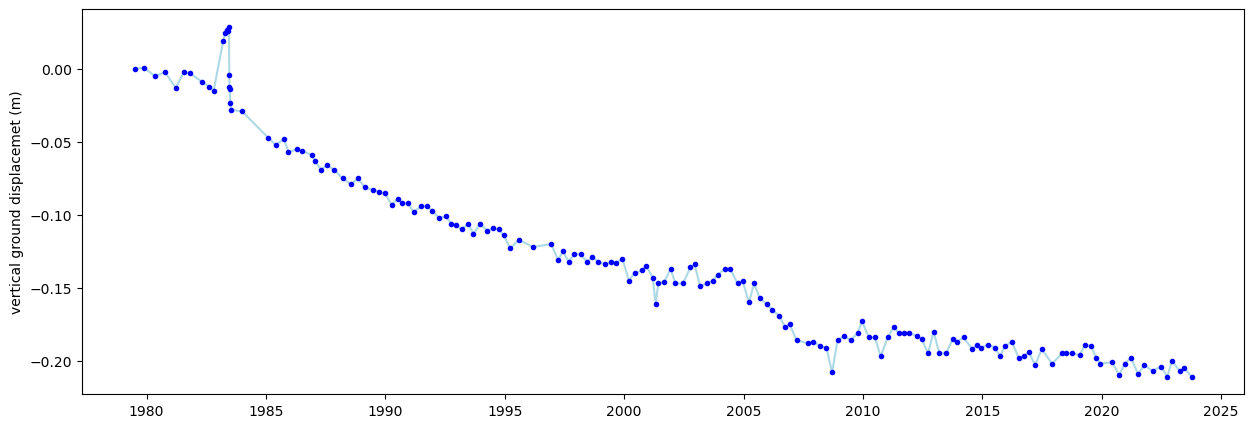

In [13]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='lightblue')
ax.plot(df.index, df['value'], color='blue', marker='.', linestyle='None')   
ax.set_ylabel('vertical ground displacemet (m)')

## &nbsp;6. Retrieval without specifying data collection method
## Using airborne gas emission rate data

In some cases there are multiple data collection methods (or sensor types) used to collect the same type of data. If you do not specify the collection method, the query returns data for all available methods. We modify the previous SO<sub>2</sub> gas query:

  - method (of data collection) = `-`, is not set
  - all other parameters remain unchanged

Complete request
- `manualcollect/WI000/plume-SO2-gasflux/MC01/-/-/2023-01-01/2024-09-01`

In [14]:
url = source+'manualcollect/WI000/plume-SO2-gasflux/MC01/-/-/2023-01-01/2024-09-01'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2023-01-15 21:30:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,contouring,nil,0.377315,kg/s,0.047454,kg/s,NaN
2023-02-07 23:30:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,contouring,nil,0.355324,kg/s,0.006944,kg/s,NaN
2023-03-09 12:30:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,contouring,nil,1.292820,kg/s,0.074074,kg/s,NaN
2023-04-26 01:00:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,contouring,nil,1.098380,kg/s,0.031250,kg/s,NaN
2023-06-12 02:30:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,contouring,nil,2.581020,kg/s,0.101852,kg/s,NaN


You may notice that the top five rows of the dataframe (from `df.head()`) show a method of `contouring`, not `flyspec` from the previous query. If we examine the values of `method` we see what methods were returned, in this case `contouring`, `cospec`, `flyspec`, `mobile-doas`. The query returns the data sorted first by `method` and then by `timestamp`.

In [15]:
df['method'].unique() #give all the values for method

array(['contouring', 'cospec', 'flyspec', 'mobile-doas'], dtype=object)

If you want SO$_2$ emission rates for all data collection methods, you can make a query for each method, or a single query and than later select which data you are interested in.

We produce a basic graph of the SO$_2$ emission rate against time and show values using the `contouring` and `flyspec` data collection methods. 

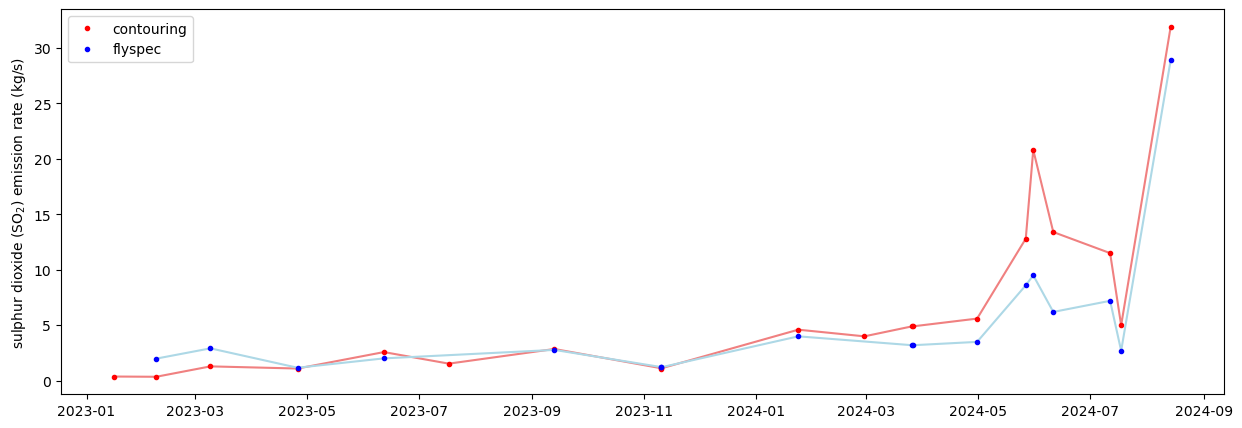

In [16]:
fig,ax = plt.subplots(figsize=(15,5))
contour = df[df['method']=='contouring']
ax.plot(contour.index, contour['value'], color='lightcoral')
ax.plot(contour.index, contour['value'], color='red', marker='.', linestyle='None', label='contouring')

flyspec = df[df['method']=='flyspec']
ax.plot(flyspec.index, flyspec['value'], color='lightblue')
ax.plot(flyspec.index, flyspec['value'], color='blue', marker='.', linestyle='None', label='flyspec')

ax.set_ylabel('sulphur dioxide (SO$_2$) emission rate (kg/s)')
ax.legend(loc='upper left')

## &nbsp;7. Retrieval without specifying sensor code
## Using water chemistry concentration data

In some cases multiple sensor codes have been used at a single station to collect the same type of data. This commonly occurs when the feature being sampled/measured changes slightly and the sampling/measurement location changes, but not enough to require a new station code. For more information refer to the Tilde volcano [Supplementary notes](https://www.geonet.org.nz/data/supplementary/volcano_tilde_notes).

If we do not specify the sensor code, we retrieve data from all sensors code at that station. This can be useful to show the complete history of data at a station.

We request data on the concentration of Chloride (Cl) in water from Black Pot Spring at Whakaari/White island.

For all manually collected data:
- domain = `manualcollect`

The specific parameters are:
  - station = `WI221`, the station code for Black Pot Spring
  - name (type of data) = `spring-Cl-conc`
  - sensorcode = `-`, is not set to get all relevant sensorcodes
  - method (of data collection) = `water-analysis-lab`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `WI221/spring-Cl-conc/-/water-analysis-lab/-`

Date range:
  - startdate = `2000-01-01`
  - enddate = `2020-01-01`

Complete request
- `manualcollect/WI221/spring-Cl-conc/-/water-analysis-lab/-/2000-01-01/2020-01-01`

In [17]:
url = source+'manualcollect/WI221/spring-Cl-conc/-/water-analysis-lab/-/2000-01-01/2020-01-01'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2000-02-15 00:00:00+00:00,manualcollect,WI221,spring-Cl-conc,MC01,water-analysis-lab,nil,498.0,mg/L,0.0,mg/L,NaN
2000-03-20 00:00:00+00:00,manualcollect,WI221,spring-Cl-conc,MC01,water-analysis-lab,nil,582.0,mg/L,0.0,mg/L,NaN
2000-07-31 00:00:00+00:00,manualcollect,WI221,spring-Cl-conc,MC01,water-analysis-lab,nil,4389.0,mg/L,0.0,mg/L,NaN
2000-08-07 00:00:00+00:00,manualcollect,WI221,spring-Cl-conc,MC01,water-analysis-lab,nil,2373.0,mg/L,0.0,mg/L,NaN
2000-08-24 00:00:00+00:00,manualcollect,WI221,spring-Cl-conc,MC01,water-analysis-lab,nil,2130.0,mg/L,0.0,mg/L,NaN


There are four unique sensor codes. These record the small changes in sampling/measurement location at station WI221.

In [18]:
df['sensorCode'].unique() #give all the values for sensorCode

array(['MC01', 'MC02', 'MC03', 'MC04'], dtype=object)

You can query each sensor code separately, or use a single query and than later select which data you are interested in.

We produce a basic graph of the Cl concentration against time and show values for each of the sensor codes. 

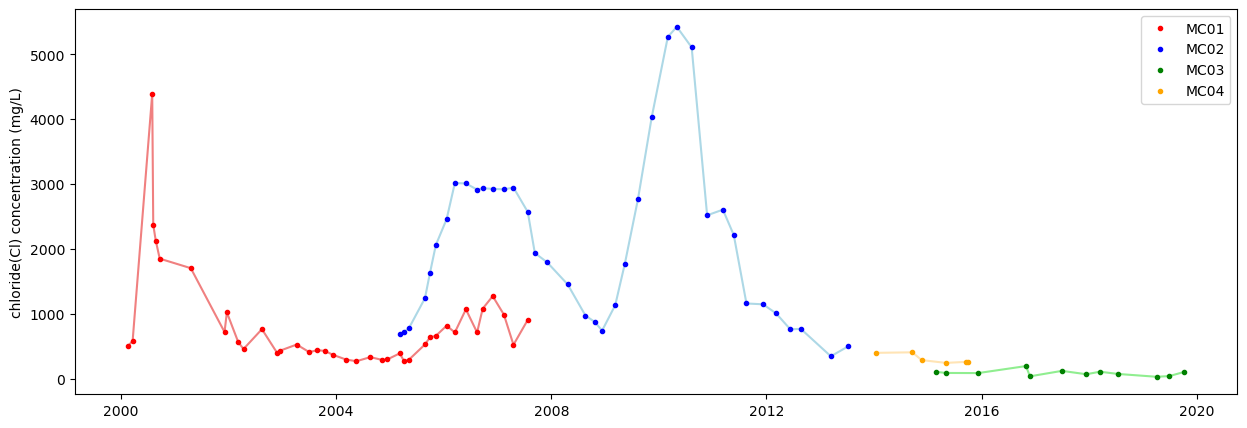

In [19]:
fig,ax = plt.subplots(figsize=(15,5))
mc01 = df[df['sensorCode']=='MC01']
ax.plot(mc01.index, mc01['value'], color='lightcoral')
ax.plot(mc01.index, mc01['value'], color='red', marker='.', linestyle='None', label='MC01')

mc02 = df[df['sensorCode']=='MC02']
ax.plot(mc02.index, mc02['value'], color='lightblue')
ax.plot(mc02.index, mc02['value'], color='blue', marker='.', linestyle='None', label='MC02')

mc03 = df[df['sensorCode']=='MC03']
ax.plot(mc03.index, mc03['value'], color='lightgreen')
ax.plot(mc03.index, mc03['value'], color='green', marker='.', linestyle='None', label='MC03')

mc04 = df[df['sensorCode']=='MC04']
ax.plot(mc04.index, mc04['value'], color='moccasin')
ax.plot(mc04.index, mc04['value'], color='orange', marker='.', linestyle='None', label='MC04')

ax.set_ylabel('chloride(Cl) concentration (mg/L)')
ax.legend(loc='upper right')

## &nbsp;8. Creating spreadsheet-like output
## Using water chemistry concentration data

Volcanic chemists often need to compare analyte concentrations from one analyte to another. They typically do this with a spreadsheet, with time in the first column and an analyte in each column across the top. Tilde deals with each data stream (analyte concentration over time) separately, but we can request concentrations for all analytes at a given site and construct a spreadsheet-like view. We can also add metadata parameters to increase the value of the view.

### Specify the data required

In [20]:
source = 'https://tilde.geonet.org.nz/v4'

mydomain = 'manualcollect'
mystation = 'RU020'
mysensorcode = 'MC01'
mymethod = 'water-analysis-lab'
myaspect = 'nil'
mytimes = '2020-01-01/2024-01-01'
myfeature = 'stream'

### Function to build the sheet. There are some parts specific to water chemistry concentration data

In [21]:
def buildsheet(source, domain, station, sensorcode, method, aspect, feature, times):
    
    #dataSummary query
    url = source+'/dataSummary/'+domain
    r = requests.get(url)
    summary = r.json()
        
    #list all data names
    datanames = summary['domain'][mydomain]['stations'][mystation]['sensorCodes'][mysensorcode]['names']
   
    #names to a list
    names = []
    for key,val in datanames.items():
        names.append(val['name'])

    print (names)
    
    data = pd.DataFrame()
    for name in names:
        url = os.path.join(source,'data',domain,station,name,sensorcode,method,aspect,times)
        #data request
        r = requests.get(url, headers={'Accept':'text/csv'})
        if r.status_code == 200:
            df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], index_col='timestamp')
            data = pd.concat([data,df])
      
    #date without time
    data['date'] = data.index.date
    
    #typical chemists spreadsheet style
    sheet = pd.pivot_table(data, index='date', values='value', columns='name')

    #remove unnecessaries from column names from analyte concentrations
    sheet.columns = sheet.columns.str.replace(feature+'-', '')
    sheet.columns = sheet.columns.str.replace('-conc', '')
    
    #add all other data to columns to right
    sheet['domain'] = domain
    sheet['station'] = station
    sheet['sensorcode'] = sensorcode
    sheet['method'] = method
    sheet['aspect'] = aspect
    sheet['times'] = times
    sheet['feature'] = feature
    
    #get additional information from station code in GitHub repo
    gh = 'https://raw.githubusercontent.com/GeoNet/delta/main/network/samples.csv'
    ghdf = pd.read_csv(gh)
    station_name = ghdf.loc[ghdf['Station'] == station, 'Name'].item()
    station_latitude = ghdf.loc[ghdf['Station'] == station, 'Latitude'].item()
    station_longitude = ghdf.loc[ghdf['Station'] == station, 'Longitude'].item()
    station_elevation = ghdf.loc[ghdf['Station'] == station, 'Elevation'].item()
    station_datum = ghdf.loc[ghdf['Station'] == station, 'Datum'].item()
    #add these columns
    sheet['station_name'] = station_name
    sheet['station_latitude'] = station_latitude
    sheet['station_longitude'] = station_longitude
    sheet['station_elevation'] = station_elevation
    sheet['station_datum'] = station_datum
    
    return(sheet)

### Build the sheet

In [22]:
mysheet = buildsheet(source, mydomain, mystation, mysensorcode, mymethod, myaspect, myfeature, mytimes)

['stream-Al-conc', 'stream-As-conc', 'stream-B-conc', 'stream-Br-conc', 'stream-Ca-conc', 'stream-Cl-conc', 'stream-F-conc', 'stream-Fe-conc', 'stream-H2S-conc', 'stream-HCO3-conc', 'stream-K-conc', 'stream-Li-conc', 'stream-Mg-conc', 'stream-NH3-conc', 'stream-NO3-N-conc', 'stream-Na-conc', 'stream-PO4-P-conc', 'stream-SO4-conc', 'stream-SiO2-conc', 'stream-d18O-conc', 'stream-d2H-conc', 'stream-pH', 'stream-temperature']


### Format a filename and write the spreadsheet-like view as a CSV file

In [23]:
timesfmt = mytimes.replace('/', '_')  
outfile = mystation+'_'+mysensorcode+'_'+mymethod+'_'+myaspect+'_'+timesfmt+'_multiview.csv'
mysheet.to_csv(outfile)